Epoch: 100; Error: 0.0;
The maximum number of train epochs is reached


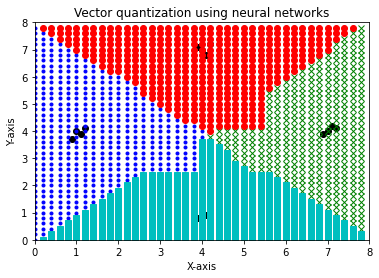

In [2]:
# 向量量化器：对 N维空间 降维
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

input_file = 'data_vq.txt'
input_text = np.loadtxt(input_file)
# data, labels = np.array(input_text[:,0:2]), np.array(input_text[:,2:])
data, labels = input_text[:, 0:2], input_text[:, 2:]

# 两层神经网络：输入含10个神经元，输出含4个神经元,[...]为每个输出的加权比
net = nl.net.newlvq(nl.tool.minmax(data), 10, [0.25, 0.25, 0.25, 0.25])

error = net.train(data, labels, epochs=100, goal=-1)

# 用网格点值进行测试
xx, yy = np.meshgrid(np.arange(0, 8, 0.2), np.arange(0, 8, 0.2))
xx.shape = xx.size, 1
yy.shape = yy.size, 1
input_grid = np.concatenate((xx, yy), axis=1)

output_grid = net.sim(input_grid)

# 将数据分为4个类
class1 = data[labels[:,0] == 1]
class2 = data[labels[:,1] == 1]
class3 = data[labels[:,2] == 1]
class4 = data[labels[:,3] == 1]

# 为每个类定义网格
grid1 = input_grid[output_grid[:,0] == 1]
grid2 = input_grid[output_grid[:,1] == 1]
grid3 = input_grid[output_grid[:,2] == 1]
grid4 = input_grid[output_grid[:,3] == 1]

# plot
plt.plot(class1[:,0], class1[:,1], 'ko', class2[:,0], class2[:,1], 'ko',
class3[:,0], class3[:,1], 'ko', class4[:,0], class4[:,1], 'ko')

plt.plot(grid1[:,0], grid1[:,1], 'b.', grid2[:,0], grid2[:,1], 'gx',
grid3[:,0], grid3[:,1], 'cs', grid4[:,0], grid4[:,1], 'ro')

plt.axis([0, 8, 0, 8])
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Vector quantization using neural networks')

plt.show()

Epoch: 100; Error: 4.199987852524544;
Epoch: 200; Error: 1.5018603447486498;
Epoch: 300; Error: 0.19675736039655436;
Epoch: 400; Error: 0.10857229307827224;
Epoch: 500; Error: 0.03796099242633872;
Epoch: 600; Error: 0.14282751950026593;
Epoch: 700; Error: 0.0356852970203957;
Epoch: 800; Error: 0.029328885100844984;
Epoch: 900; Error: 0.03330704468665277;
Epoch: 1000; Error: 0.06413086760883445;
The maximum number of train epochs is reached


<ipython-input-3-eff44de215b7>:58: UserWarning: Legend does not support 'G' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Ground truth', 'Predicted output')
<ipython-input-3-eff44de215b7>:58: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Ground truth', 'Predicted output')
<ipython-input-3-eff44de215b7>:58: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Ground truth', 'Predicted output')
<ipython-input-3-eff44de215b7>:58: UserWarning: Legend does not support 'u' instances.
A proxy artist may be 

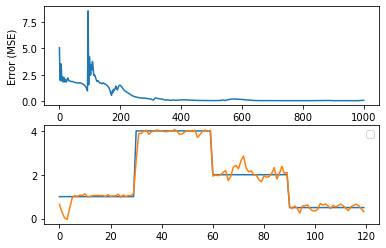

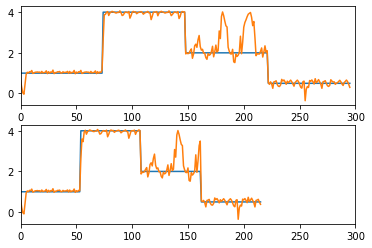

In [3]:
# 为序列数据分析创建一个递归神经网络

# 创建输入波形
def create_waveform(num_points):
    # training samples -> input data
    data1 = 1 * np.cos(np.arange(0, num_points))
    data2 = 2 * np.cos(np.arange(0, num_points))
    data3 = 3 * np.cos(np.arange(0, num_points))
    data4 = 4 * np.cos(np.arange(0, num_points))    
    
    # 创建不同的振幅 -> labels
    amp1 = np.ones(num_points)
    amp2 = 4 + np.zeros(num_points)
    amp3 = 2 * np.ones(num_points)
    amp4 = 0.5 + np.zeros(num_points)
    
    data = np.array([data1, data2, data3, data4]).reshape(num_points * 4, 1)
    amplitude = np.array([amp1, amp2, amp3, amp4]).reshape(num_points * 4, 1)
    
    return data, amplitude

# 使用网格画出输出结果
def draw_output(net, num_points_test):
    data_test, amplitude_test = create_waveform(num_points_test)
    output_test = net.sim(data_test)
    plt.plot(amplitude_test.reshape(num_points_test * 4))
    plt.plot(output_test.reshape(num_points_test * 4))
    

# main
num_points = 30
data, amplitude = create_waveform(num_points)

# create two layers "Recurrent neural network" : ([minmax], [num_layers], [perce rate])
net = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])

# 设定每层的初始化函数
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()

# Traning RNN
error = net.train(data, amplitude, epochs=1000, show=100, goal=0.01)

# output
output = net.sim(data)

# plot training error
plt.subplot(211)
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error (MSE)')

# plot output
plt.subplot(212)
plt.plot(amplitude.reshape(num_points * 4))
plt.plot(output.reshape(num_points * 4))
plt.legend('Ground truth', 'Predicted output')

# 创建一个随机长度的波形，看RNN是否可以预测
plt.figure()

plt.subplot(211)
draw_output(net, 74)
plt.xlim([0, 300])

plt.subplot(212)
draw_output(net, 54)
plt.xlim([0, 300])

plt.show()

In [4]:
# RNN 识别光学字符
import os, sys
import cv2
import numpy as np

input_file = 'letter.data'

# parameters
scaling_factor = 10
start_index = 6
end_index = -1
h, w = 16, 8

# Iter , split(Tab)
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = np.array([255*float(x) for x in line.split('\t')[start_index:end_index]])
        
        # 重组数组形状，并调整大小
        img = np.reshape(data, (h, w))
        img_scaled = cv2.resize(img, None, fx=scaling_factor, fy=scaling_factor)
        cv2.imshow('Image',img_scaled)
        
        c = cv2.waitKey()
        if c == 27:
            break

cv2.destroyAllWindows()

In [5]:
import numpy as np
with open('letter.data', 'r') as f:
    for line in f.readlines():
        data = np.array([255*float(x) for x in line.split('\t')[6:-1]])

print(data[:50])

[  0. 255. 255.   0.   0.   0.   0.   0.   0.   0. 255.   0.   0.   0.
   0.   0.   0.   0. 255.   0.   0.   0.   0.   0.   0.   0. 255. 255.
   0.   0.   0.   0.   0.   0.   0. 255.   0.   0.   0.   0.   0.   0.
   0. 255.   0.   0.   0.   0.   0.   0.]


In [12]:
# Neural Network : 创建一个光学字符识别器
import numpy as np
import neurolab as nl

input_file = 'letter.data'

# NN 花费的训练时间很长，这里只用20个数据点
num_datapoints = 20

# 观察数据集，前20行有7个不同字符，定义：
orig_labels = 'omandig'
num_output = len(orig_labels)
num_train = int(0.9  * num_datapoints)
num_test = num_datapoints - num_train

# datasets 提取 index
start_index, end_index = 6, -1

# generate datasets
data = []
labels = []
with open(input_file,'r') as f:
    for line in f.readlines():
        list_vals = line.split('\t')
        
        if list_vals[1] not in orig_labels:
            continue
        
        # extract labels
        label = np.zeros((num_output, 1)) # num_output * 1 阶 0 矩阵
        label[orig_labels.index(list_vals[1])] = 1
        labels.append(label)
        
        # extract char
        cur_char = np.array([float(x) for x in list_vals[start_index:end_index]])
        data.append(cur_char)
        
        if len(data) >= num_datapoints: # 注意 >= 条件，否则矩阵 reshape 会出问题
            break

# 将数据转为Numpy数组
data = np.asfarray(data)
print('\nLabels:',labels)
labels = np.array(labels).reshape(num_datapoints, num_output)
print('\nReshape Labels:',labels)

# 提取数据的维度
num_dim = len(data[0])

# iter = 10000, training and test
net = nl.net.newff([[0, 1] for _ in range(len(data[0]))], [128, 16, num_output])
net.trainf = nl.train.train_gd
error = net.train(data[:num_train,:], labels[:num_train,:], epochs=10000, show=100, goal=0.01)

predicted_output = net.sim(data[num_train:,:])
print('\nTesting on unknown data:')
for i in range(num_test):
    print('\nOriginal:', orig_labels[np.argmax(labels[i])])
    print('Predicted:',orig_labels[np.argmax(predicted_output[i])])
    


Labels: [array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]]), array([[0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]]), array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]]), array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]]), array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]]), array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]]), array([[0.],
       [1.],
       [0.],
       [0.],
       [

In [11]:
import numpy as np
print(np.zeros((7,2)))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
